In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
camnugent_california_housing_prices_path = kagglehub.dataset_download('camnugent/california-housing-prices')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

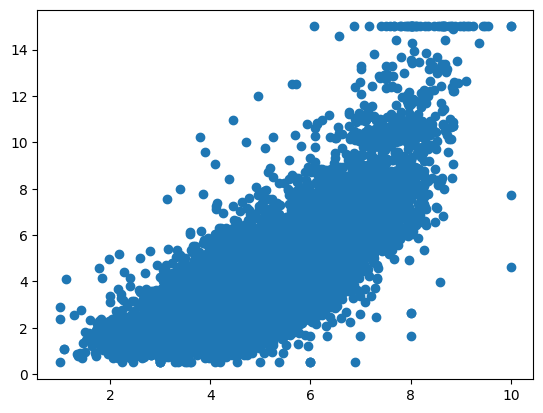

In [ ]:
plt.scatter(x=df.total_rooms/df.total_bedrooms, y=df.median_income)
plt.show()
df['rooms_per_bedroom'] = df['total_rooms'] / df['total_bedrooms']

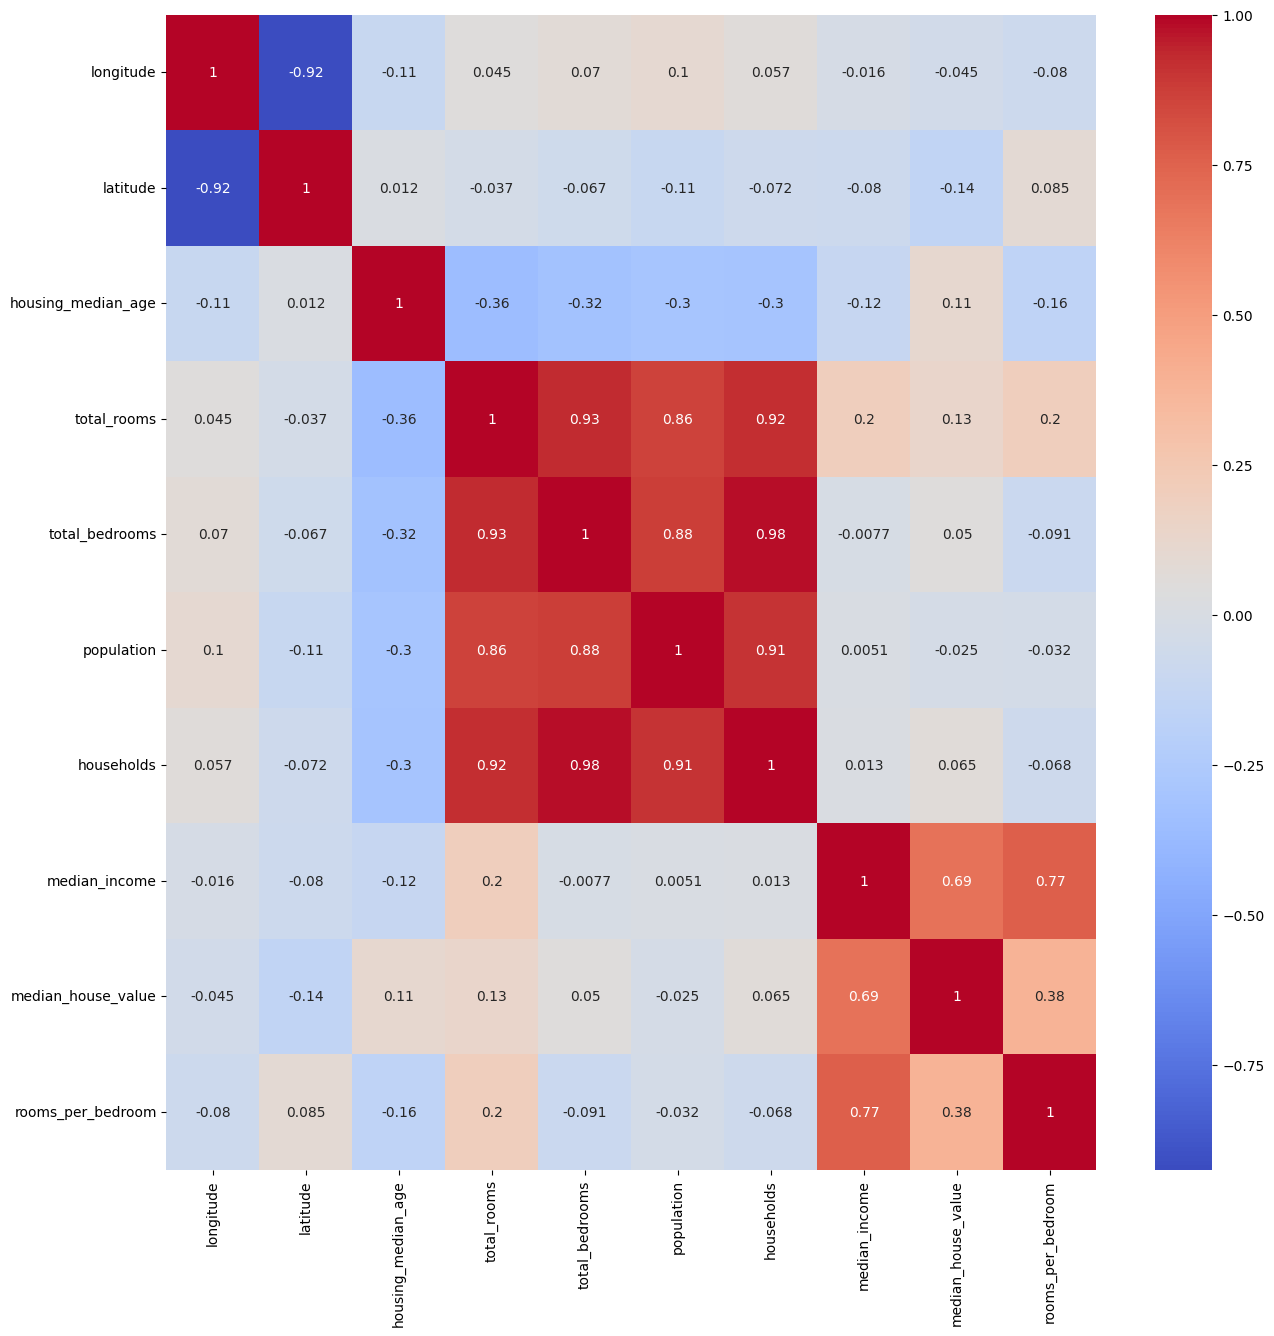

In [ ]:
df.drop(['ocean_proximity'], axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.savefig("correlationheatmap.png")

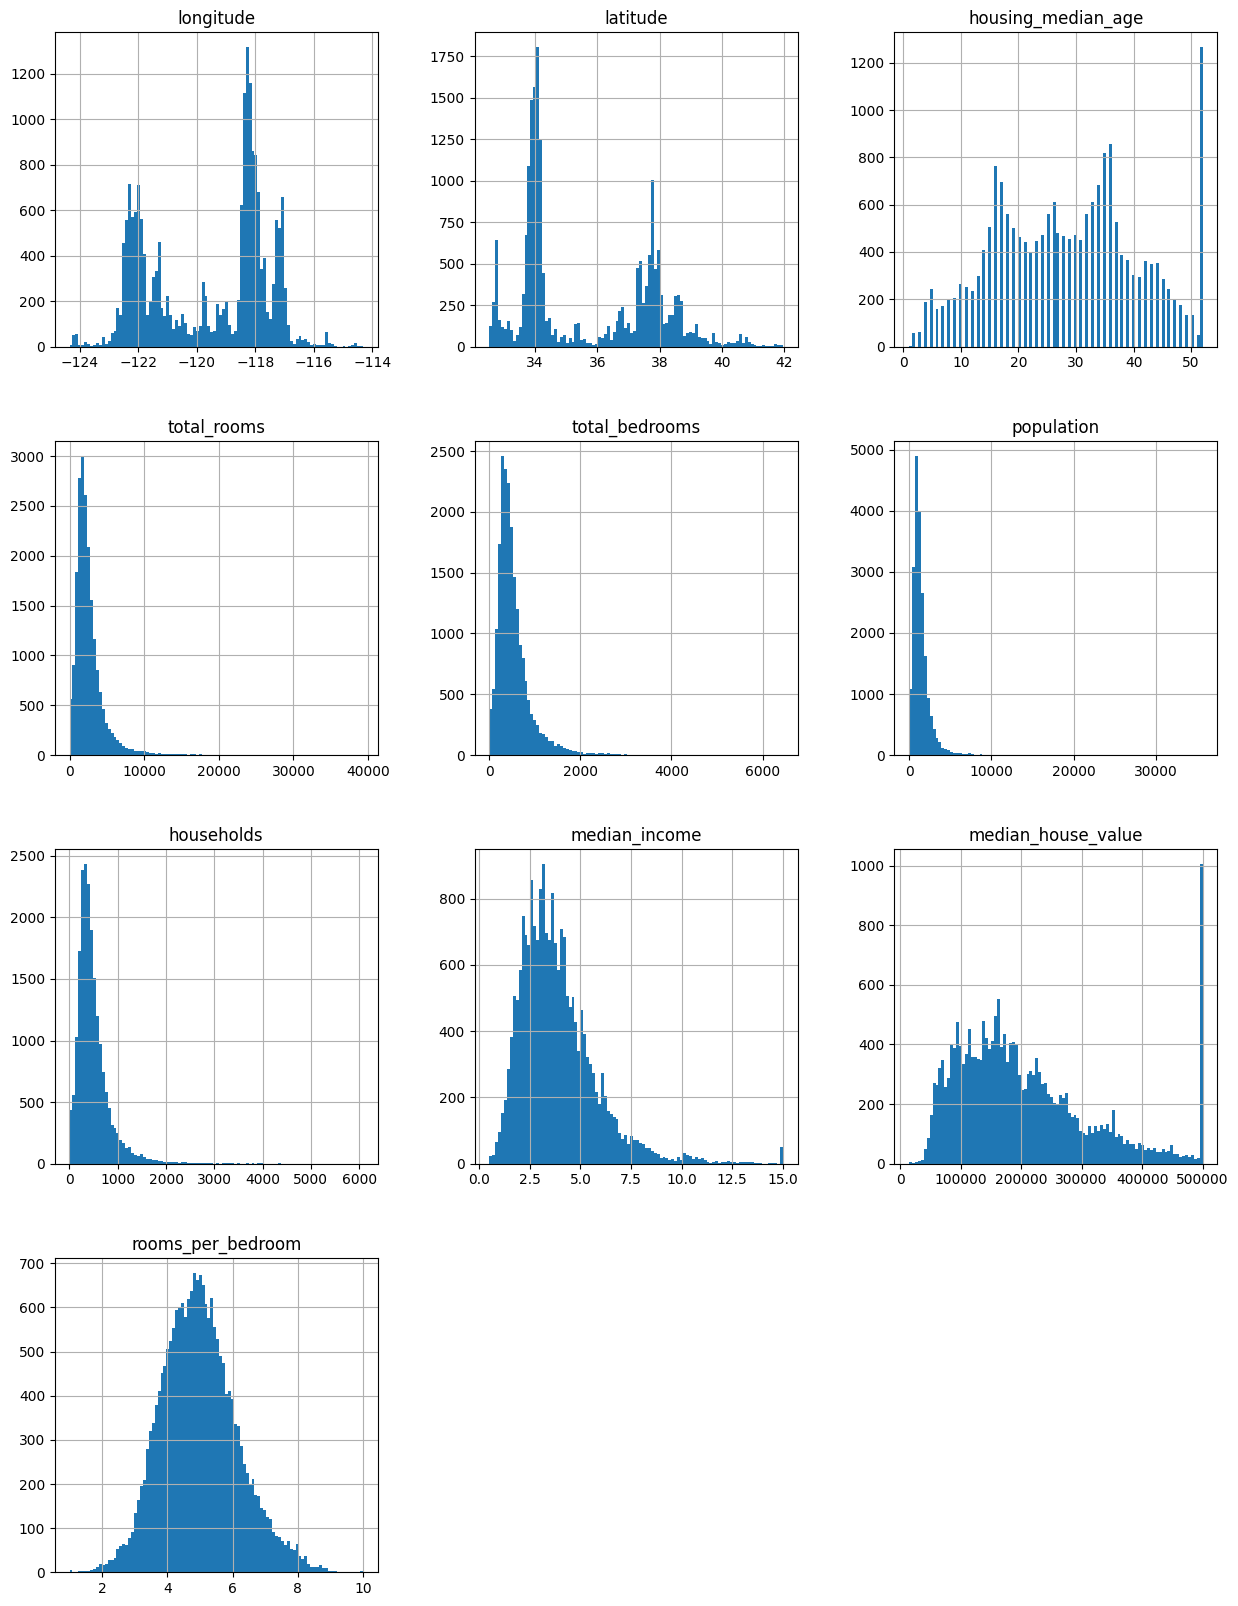

In [ ]:
df.hist(bins=100,figsize=(15,20))
plt.show()

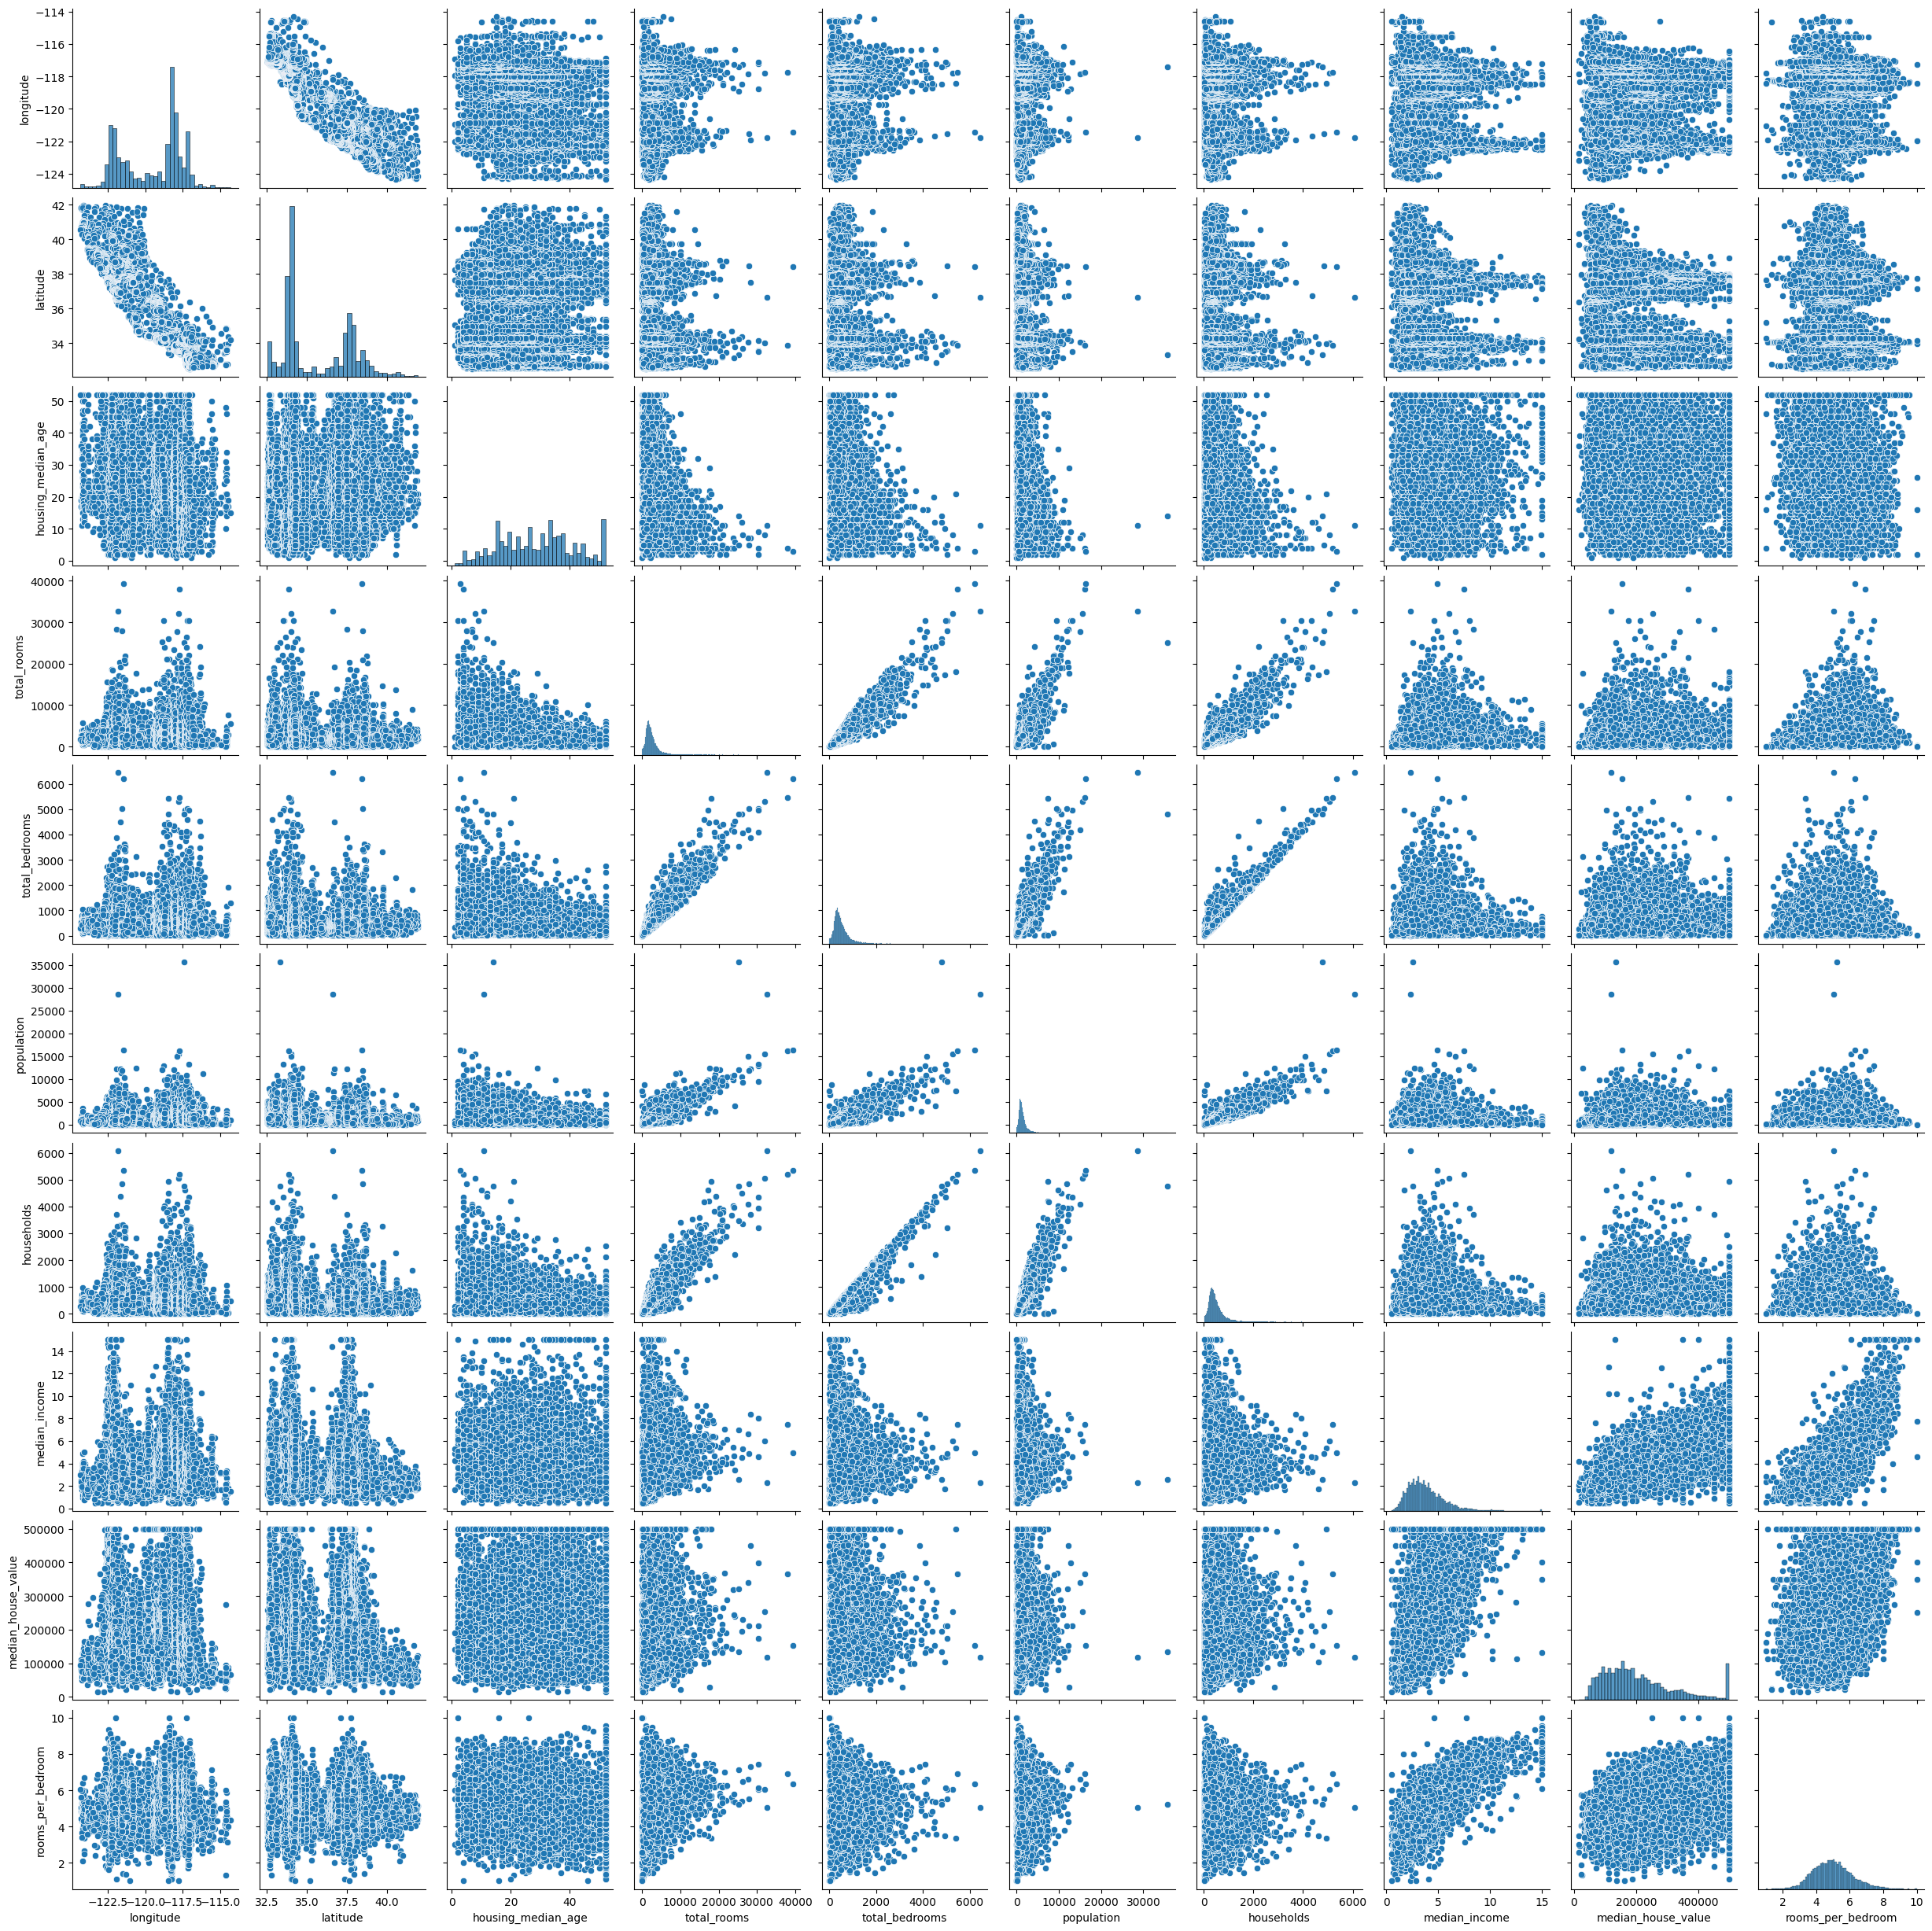

In [ ]:
sns.pairplot(df.drop(['ocean_proximity'], axis=1))
plt.show()

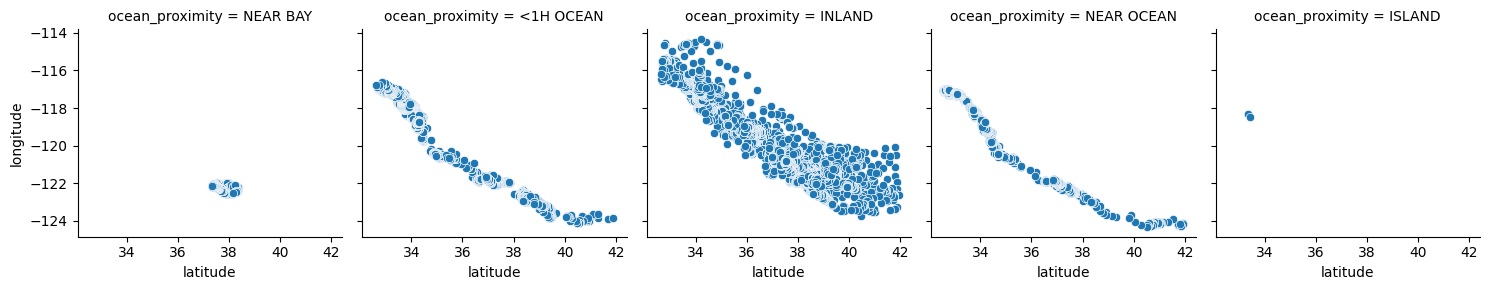

In [ ]:
g = sns.FacetGrid(df, col='ocean_proximity')
g.map(sns.scatterplot, "latitude", "longitude")


<Axes: xlabel='latitude', ylabel='longitude'>

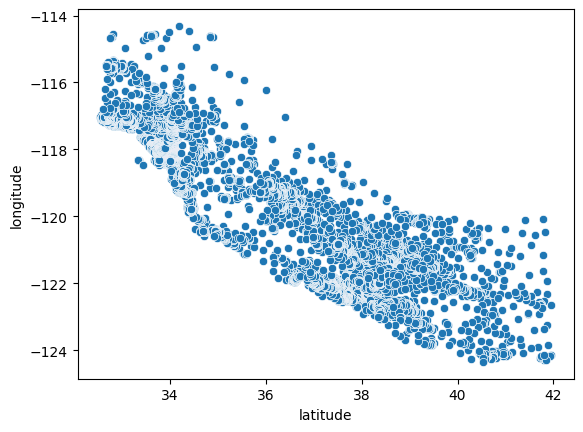

In [ ]:
sns.scatterplot(x=df.latitude, y=df.longitude, data=df)

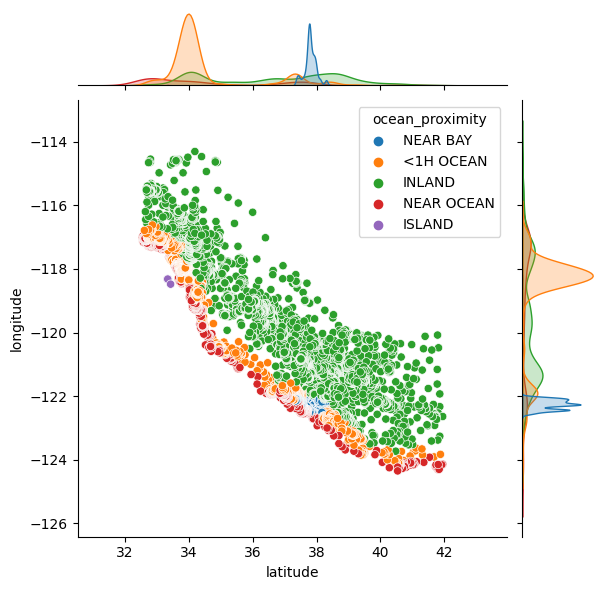

In [ ]:
sns.jointplot(data=df, x="latitude", y="longitude", hue="ocean_proximity")
plt.show()

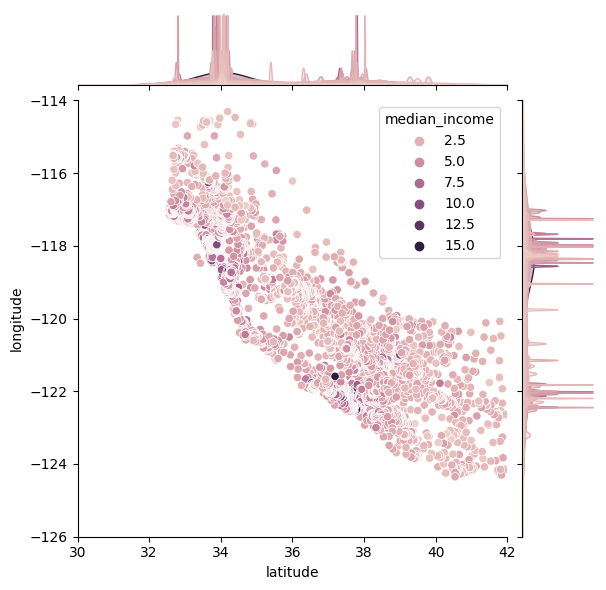

In [ ]:
sns.jointplot(data=df, x="latitude", y="longitude", hue="median_income")
plt.xlim(30, 42)
plt.ylim(-126, -114)
plt.show()

<Axes: xlabel='total_rooms', ylabel='population'>

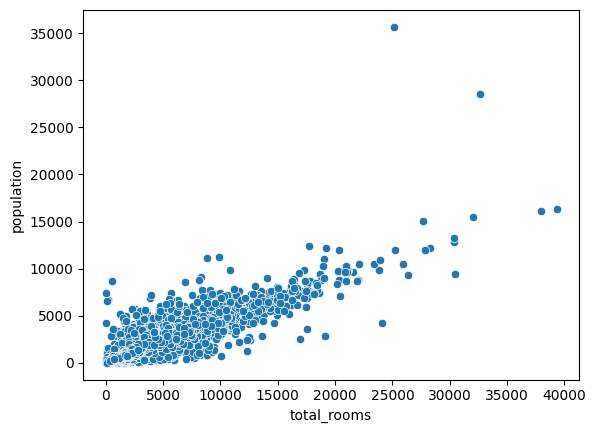

In [ ]:
sns.scatterplot(x='total_rooms', y='population', data=df)

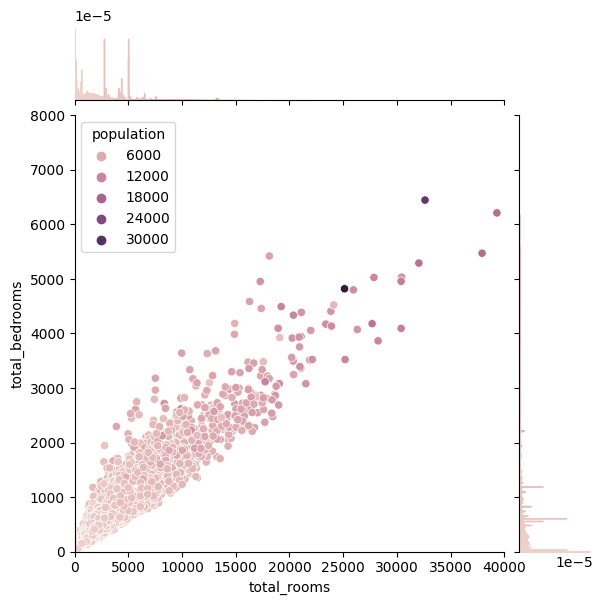

In [ ]:
sns.jointplot(data=df, x='total_rooms', y="total_bedrooms", hue='population')
plt.xlim(0, 40000)
plt.ylim(0, 8000)
plt.show()

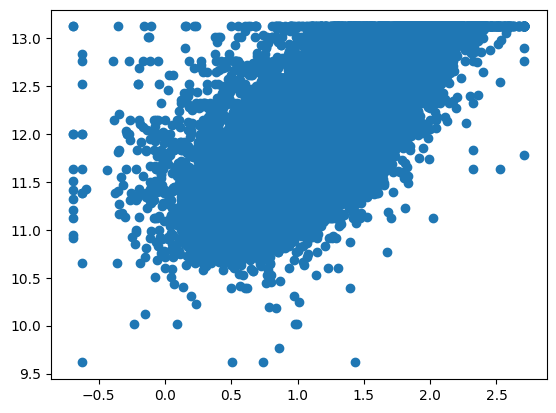

In [ ]:
plt.scatter(np.log(df.median_income), np.log(df.median_house_value))

In [ ]:
X = df.drop(['median_house_value',], axis=1)
y = df['median_house_value']

In [ ]:
encoder = OrdinalEncoder()
X['ocean_proximity'] = encoder.fit_transform(X[['ocean_proximity']])

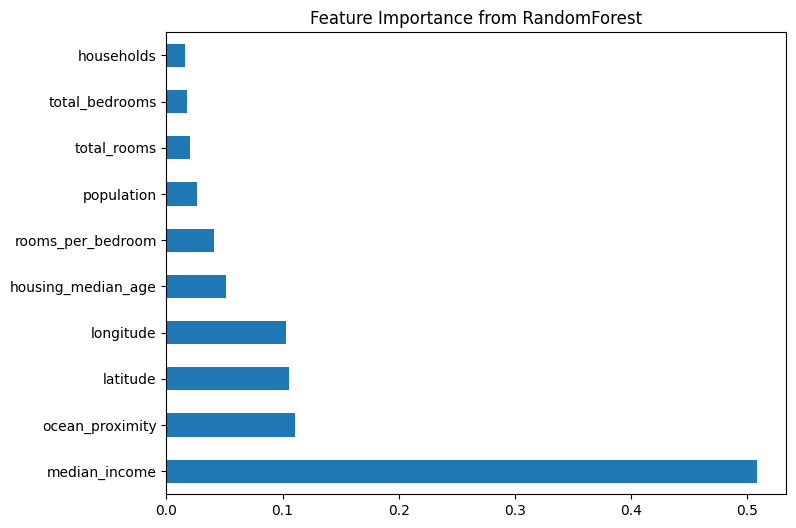

In [ ]:
# Train RandomForest
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features)

# Sort and plot
feat_importance.sort_values(ascending=False).plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance from RandomForest')
plt.savefig('featureImportance.png')
plt.show()

In [ ]:
cum = 0
features = []
for idx, feature in feat_importance.sort_values(ascending=False).items():
    if cum >= 0.95:
        break
    features.append(idx)
    cum += feature

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

In [ ]:
# Identify columns
# Separate numeric and categorical columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()        # categorical column

# Preprocessing
# Create transformers
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

In [ ]:

param_grid = [
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10]
    },
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5]
    },
    {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    }
]


# GridSearchCV
search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best R2 Score:", search.best_score_)

Best Parameters: {'model': RandomForestRegressor(), 'model__max_depth': None, 'model__n_estimators': 100}
Best R2 Score: 0.8126548824792863


In [ ]:
# Best pipeline object (fitted)
best_pipeline = search.best_estimator_

# Predict with best model
y_pred_test = best_pipeline.predict(X_test)

# See all results
pd.DataFrame(search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.011881      0.005292         0.003159        0.000252   
1        0.008829      0.000517         0.003089        0.000207   
2        0.008783      0.000318         0.003076        0.000166   
3        0.030853      0.002659         0.004949        0.001265   
4        0.030563      0.000733         0.004740        0.001699   
5        0.027074      0.000560         0.004986        0.001369   
6        0.027146      0.003273         0.007382        0.000987   
7        4.082526      0.042301         0.052267        0.000512   
8        8.150739      0.026904         0.102053        0.001490   
9        2.559311      0.022474         0.020926        0.000419   
10       5.079061      0.011814         0.037697        0.000583   
11       0.127265      0.001110         0.004287        0.000031   
12       0.121103      0.003022         0.004110        0.000097   
13       0.048109      0.002216         0.003350        0.000029   
14       0.046956      0.000318         0.003300        0.000060   
15       0.079753      0.000610         0.003506        0.000047   
16       0.079380      0.000518         0.003524        0.000107   
17       1.331565      0.012651         0.006433        0.000064   
18       2.640990      0.007869         0.009836        0.000072   
19       2.148743      0.003600         0.009505        0.001107   
20       4.290020      0.023693         0.014451        0.000113   
21       1.311272      0.006850         0.006305        0.000151   
22       2.622616      0.018583         0.008732        0.000159   
23       2.124527      0.011363         0.008585        0.000300   
24       4.238336      0.028459         0.012166        0.000174   

                    param_model param_model__alpha param_model__max_depth  \
0                       Ridge()                0.1                    NaN   
1                       Ridge()                1.0                    NaN   
2                       Ridge()               10.0                    NaN   
3                       Lasso()              0.001                    NaN   
4                       Lasso()               0.01                    NaN   
5                       Lasso()                0.1                    NaN   
6                       Lasso()                1.0                    NaN   
7       RandomForestRegressor()                NaN                   None   
8       RandomForestRegressor()                NaN                   None   
9       RandomForestRegressor()                NaN                     10   
10      RandomForestRegressor()                NaN                     10   
11      DecisionTreeRegressor()                NaN                   None   
12      DecisionTreeRegressor()                NaN                   None   
13      DecisionTreeRegressor()                NaN                      5   
14      DecisionTreeRegressor()                NaN                      5   
15      DecisionTreeRegressor()                NaN                     10   
16      DecisionTreeRegressor()                NaN                     10   
17  GradientBoostingRegressor()                NaN                      3   
18  GradientBoostingRegressor()                NaN                      3   
19  GradientBoostingRegressor()                NaN                      5   
20  GradientBoostingRegressor()                NaN                      5   
21  GradientBoostingRegressor()                NaN                      3   
22  GradientBoostingRegressor()                NaN                      3   
23  GradientBoostingRegressor()                NaN                      5   
24  GradientBoostingRegressor()                NaN                      5   

   param_model__n_estimators param_model__min_samples_split  \
0                        NaN                            NaN   
1                        NaN                            NaN   
2                        NaN               

In [ ]:
print(best_pipeline.score(X_test,y_test))

0.8206241227318827


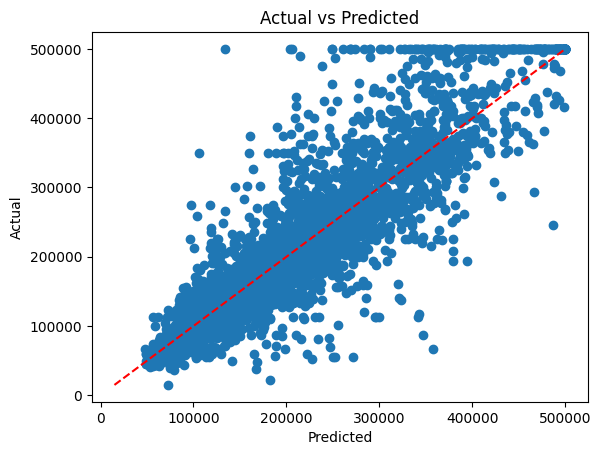

In [ ]:
# Scatter plot: predicted vs actual
plt.scatter(y_pred_test, y_test)

# Plot y = x line for reference
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, 'r--')  # Red dashed diagonal line

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()